# Cellector: a tool for cell counting

#### by: Mac Englund + Alexia Williams

##### here we made a class of functions, which in theory could all be used as different ways or different tools for cell counting. some work better than others, but I think with some optimization and further development of programming skills, some of this might actually pan out!

In [1]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from skimage import io
from skimage import feature
from skimage import filters
from skimage import data
from skimage.color import rgb2gray

from skimage import measure
import cv2 as cv
import cv2 as cv2
import imageio

from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import img_as_float
from skimage import exposure
from skimage import data
from skimage.filters import threshold_otsu

In [10]:
class cellector:
    def __init__(self,image):
        self.image = image
        plt.imshow(image)
        plt.show()

    def separate_color(self):
        f, axarr = plt.subplots(1,4,figsize=(15,5) )
        for i in range(4):
            axarr[i].imshow(image[:,:,i], cmap='gray')
        #This function separates out the image colors.. I just used this as a quick example to test out how classes work

    def morph_count(self):        
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        fig = plt.figure(1, figsize=(10,3))
        plt.imshow(gray, cmap='gray', interpolation = 'bicubic')
        plt.show()

        ret, bin_im = cv.threshold(gray,20,255,cv.THRESH_BINARY)

        fig = plt.figure(2,figsize=(10,3))
        plt.imshow(bin_im, cmap='gray', interpolation = 'bicubic')

        struct = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))

        im_erode = cv.erode(bin_im, struct)
        fig = plt.figure(3,figsize=(10,3))
        plt.imshow(im_erode, cmap = 'gray', interpolation = 'bicubic')
        plt.show()

        im_dilate = cv.dilate(im_erode, struct)
        fig = plt.figure(4,figsize=(10,3))
        plt.imshow(im_dilate, cmap = 'gray', interpolation = 'bicubic')
        plt.show()
        
        labels1 = measure.label(im_erode)
        print('erode cells:',labels1.max())
        
        labels = measure.label(im_dilate)
        print('dilate cells:',labels.max())
        
        # this code takes in an image and converts it to grayscale, defines a threshold based on color, selects objects within 
        # that range, rids of anything not in that range, and then reports back the number of remaining objects.    
    

 ### various cell counting based on histogram equalization techniques        
    def hist_equalize(self):
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)   
        img_eq = exposure.equalize_hist(gray) 
        plt.imshow(img_eq, cmap = 'gray')     
        plt.show()

        labels = measure.label(img_eq)
        print(labels.max())
        
    def contrast_stretch(self):
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        p2, p98 = np.percentile(gray, (2, 98))
        img_rescale = exposure.rescale_intensity(gray, in_range=(p2, p98)) 
        plt.imshow(img_rescale, cmap = 'gray')     
        plt.show()

        labels = measure.label(img_rescale)
        print(labels.max())  
        
     
    def adapt_equalization(self):
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        img_adapteq = exposure.equalize_adapthist(gray, clip_limit=0.03)
        plt.imshow(img_adapteq, cmap = 'gray')     
        plt.show()

        labels = measure.label(img_adapteq)
        print(labels.max())            
        
        


    def smallcell(self):
        
        ###
        
        # This function requires user input (this part has not been added in yet, I could not get it to work)
        # The user draws a circle around the smallest cell 
        # The rest of the function then filters out all other cells in the image, so that only the user drawn circle is left
        # The area of this user drawn circle is then calculated and returned
        # So that it may be used as a parameter to constrain cell size, when the cell size counting algorith is used. 
        
        # ****** Since the user input doesn't work yet, I have manually drawn a red circle in Photoshop for now and used that 
        # ****** as an input image for now for these functions
        # ****** I've loaded that image in... however, the complete version would just pass the normal image 
        # ****** as is done for other functions in this class 
        
        ###
         
        
        
        gray1_file = 'Flouro_Ruby_Thalamus_Test_1_input.png'                   #loads in new image with user drawing on it 
        gray1 = sk.io.imread(gray1_file)              #reads in image  
    
        
        blue = gray1[:,:,2]                               #selects the blue channel 
        
        ret, bin_im = cv.threshold(blue,200,255,cv.THRESH_BINARY)  #selects/filters to just the blue circle and prints the image
        struct = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))
        im_erode = cv.erode(bin_im, struct)
        fig = plt.figure(3,figsize=(20,6))
        plt.imshow(im_erode, cmap = 'gray', interpolation = 'bicubic')     
        plt.show()                                         
        #ok now that we have an image with just the selected circle, we need to measure it 
        
        
        # need to find the circle we drew in this image, so we will use contours 
        # http://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py
        ret,thresh = cv.threshold(im_erode,127,255,0)
        #im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
        contours,hierarchy = cv.findContours(thresh, 1, 2)
        cnt = contours[0]
        M = cv.moments(cnt)
    
        # metrics of circle you drew 
        area = cv.contourArea(cnt)
        perimeter = cv.arcLength(cnt,True)
        min_radius = perimeter / (2*3.14159)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print('This is the number of circles you drew:', len(contours))
        print('area of your small circle:',area)  
        print('perimeter of your circle:',perimeter)
        print('radius of your circle',min_radius)
        print('location of your circle:',cx,cy) #prints coordinates for verification it was their circle they drew
        
        min_area = area 
        return min_area
        #This function then returns the variable min_area as a parameter which can be used in future functions as requirement

        
    
    def largecell(self):
        
        ###
        
        # Similar to small cell, but: 
        # The user draws a circle around the largest cell 
        # The rest of the function then filters out all other cells in the image, so that only the user drawn circle is left
        # The area of this user drawn circle is then calculated and returned
        # So that it may be used as a parameter to constrain cell size, when the cell size counting algorithm is used. 
        
        # ****** Since the user input doesn't work yet, I have manually drawn a red circle in Photoshop for now 
        # ****** and loaded that image in... however, the complete version would just pass the normal image 
        # ****** as is done for other functions in this class 
        
        ###
        
        
        gray1_file = 'Flouro_Ruby_Thalamus_Test_1_input.png'                  #loads in new image with user drawing on it 
        gray1 = sk.io.imread(gray1_file)                  #reads in image  
        
             
        green = gray1[:,:,1]                               #selects the green channel      
        
        
        #A lot of these cellsize functions rely on cv.THRESH_BINARY !!
        # IT is important that these parameters be messed around with to see how different contours are drawn
        ret, bin_im = cv.threshold(green,200,255,cv.THRESH_BINARY)  #selects/filters just the green circle and prints the image
        struct = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))
        im_erode = cv.erode(bin_im, struct)
        
        
        fig = plt.figure(3,figsize=(20,6))
        plt.imshow(im_erode, cmap = 'gray', interpolation = 'bicubic')     
        plt.show()                                         
        #ok now that we have an image with just the selected circle, we need to measure
        
        
        # need to find the circle we drew in this image, so we will use contours 
        # See reference: 
        # http://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py
        ret,thresh = cv.threshold(im_erode,127,255,0)
        #im2,contours,hierarchy = cv.findContours(thresh, 1, 5)
        contours,hierarchy = cv.findContours(thresh, 1, 5)
        cnt = contours[0]
        M = cv.moments(cnt)
        
        #ret, thresh = cv.threshold(imgray, 127, 255, 0)
       # contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        
        
        
        
        # metrics of circle you drew 
        area = cv.contourArea(cnt)
        perimeter = cv.arcLength(cnt,True)
        max_radius = perimeter / (2*3.14159)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print('This is the number of circles you drew:', len(contours))
        print('area of your larger circle:',area)  
        print('perimeter of your circle:',perimeter)
        print('radius of your circle',max_radius)
        print('location of your circle:',cx,cy) #prints coordinates for verification it was their circle they drew
        
        max_area = area # this should be equal to the area variable in truth  
        return max_area
    
        #This function then returns the variable max_area as a parameter which can be used in future functions as requirement
        
        
        
        
        
    def cellsize(self,min_area,max_area):
        
        ###
        
        # This function (which took FOREVER to get working) takes in the min_area and max_area, 
        # as produced by the smallcell() and largecell() functions 
        # it uses those as upper and lower bounds to count only cells within those inputs
        # however, we are once again misguided by our threshold functions. SO take it with a grain of salt for now :)
        # Another idea would is to have the user select a few cells, computer the average size / std dev of those, and 
        # run that thru this function, using the 2 std deviations away from mean size as the min_area and max_area
        
        ###  
        
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray,90,90,90)
        
        #x, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        cv2.drawContours(image,contours,-1,(100,100,100),3)
        
        
        #measures the area of the contours
        a = []  
        for i in range(len(contours)):
            a.append(cv2.contourArea(contours[i]))

            
        #refines the cell count using area parameters      
        cells = [] 
        notcells = []
        for items in a: 
            if items > min_area and items < max_area:
                cells.append(items)
                #print('area of this cell is:',items)
            else: notcells.append(items)
        
        print('')
        print('Total Number of Cells is:',len(cells))
        print('Total Number of other objects', len(notcells))
        
    
        #Displays and ends code on X
        cv2.namedWindow('Display',cv2.WINDOW_NORMAL)
        cv2.imshow('Display',image)
        cv2.waitKey()
    
 
    def blob_compare(self):
        # This uses skimage instead of CV to identify blobs
        
        imageboost = image - 3 # splits the image out with contrast 
        imagegray = rgb2gray(imageboost)
        
        fig = plt.figure(3,figsize=(20,8))
        plt.imshow(imagegray, cmap = 'gray', interpolation = 'bicubic')     
        plt.show()  
        
        blobs_doh = blob_doh(imagegray, max_sigma = 30, threshold = .01)
        #print (blobs_doh)
        print(len(blobs_doh))
        
        plt.imshow(imagegray, cmap='gray')
        for blob in blobs_doh:
            x, y, size = blob
            c = plt.Circle((y, x), size, color='b', fill=False )
            plt.gca().add_artist(c)
        #plt.savefig('blobplot.png')
        labels = measure.label(blob)
        print(labels.max()) 

# I then want to run this function through the smallcell, largecell, and cellsize functions 
# And then hopefully, that combines the best of skimage and cv2 
# However, what I am missing is how to store/ save a plot in memory

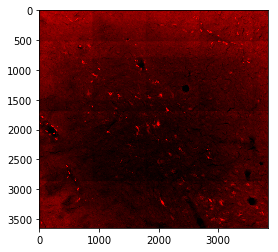

In [11]:
# loading in image for processing 

#image = sk.io.imread('https://raw.githubusercontent.com/alexiawilliams/pythonfinalproject/master/PVN.png')
image = sk.io.imread('Flouro_Ruby_Thalamus_Test_1.png')
#image_gray = sk.color.rgb2gray(image_read)
#image_gray_thresh = image_gray > .1
#image_crop = image_gray_thresh[800:]
#image = image_crop

#plt.imshow(image)

#gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#plt.savefig('Flouro_Ruby_Thalamus_Test_Thresh.png')


# we can pass our image through our class, which then prints the image when it initializes
pvncounts = cellector(image)

#Then that image is then stored within the variable pvncounts 
#and this allows us to use that same image, but access different functions we made in the class
#so we can call the function separate_color, which we defined in our cellector class

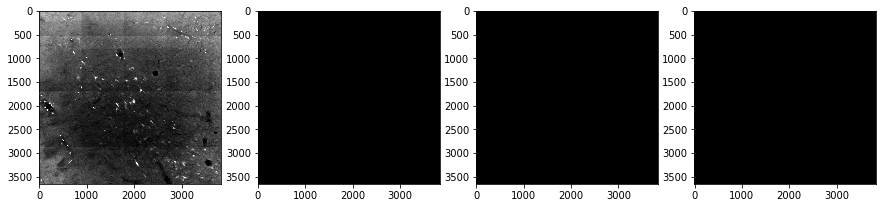

In [12]:
# calling various functions from cellector to see if they work properly/how they do

pvncounts.separate_color()

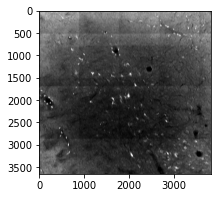

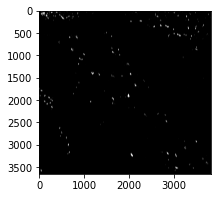

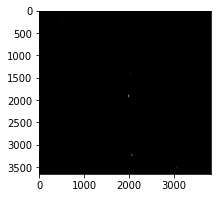

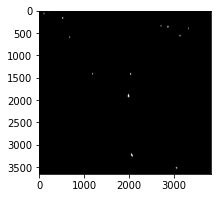

erode cells: 15
dilate cells: 14


In [13]:
pvncounts.morph_count()

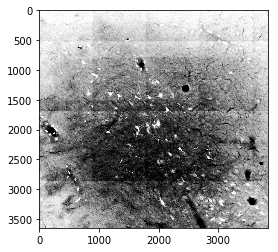

497


In [14]:
pvncounts.hist_equalize()

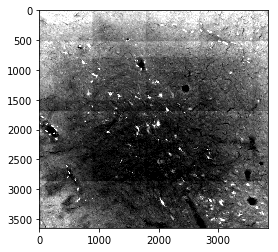

439228


In [15]:
pvncounts.contrast_stretch()

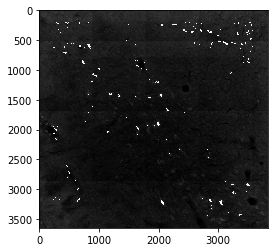

2


In [16]:
pvncounts.adapt_equalization()

In [17]:
#a = pvncounts.smallcell()
#b = pvncounts.largecell()

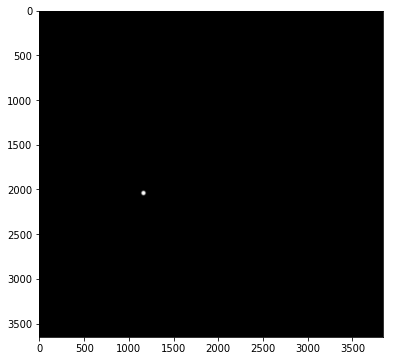

This is the number of circles you drew: 1
area of your small circle: 1670.0
perimeter of your circle: 153.19595956802368
radius of your circle 24.38191482147952
location of your circle: 1166 2041


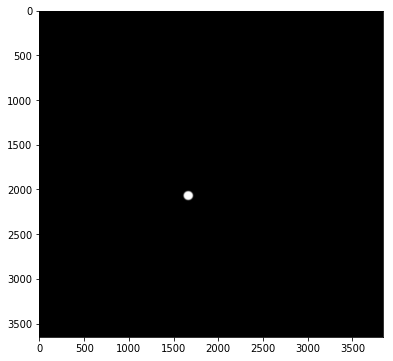

This is the number of circles you drew: 1
area of your larger circle: 7978.0
perimeter of your circle: 326.96138763427734
radius of your circle 52.03756499643132
location of your circle: 1666 2070

Total Number of Cells is: 4
Total Number of other objects 994


In [18]:
pvncounts.cellsize(pvncounts.smallcell(),pvncounts.largecell()) # these functions need to be run altogether

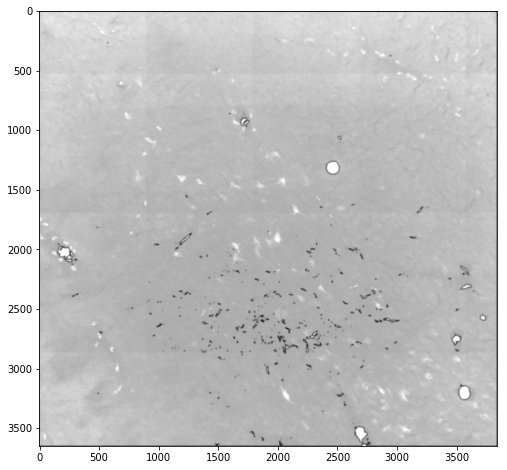

MemoryError: 

In [19]:
pvncounts.blob_compare()